In [53]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#import models
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model

from sklearn import model_selection
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from tabulate import _table_formats, tabulate

In [54]:
datas = '/Users/pkrok/OneDrive/Python/Giannakopoulos/Data.xlsx'

In [55]:
pd.set_option("display.max_columns", None)
df=pd.read_excel(datas)
df.head(2)
df['logD'] = np.log10(df['diffusivity'])
# df = df.dropna()
df

,type,cell,aperture,aperture2,ExpansionRatio,M-N,Μ-N_lff,Μ-N_kFF,ionicRad,MetalCharge,apertureAtom_charge,apertureAtom_σ,apertureAtom_e,linker_length1,linker_length2,linker_length3,linker_mass1,linker_mass1.1,linker_mass3,func1_length,func2_length,func3_length,func1_mass,func2_mass,func3_mass,func1_charge,func2_charge,func3_charge,gas,mass,Dbulk,ascentricF,size - van der Waals (Å),size - kinetic diameter (Å),diffusivity,solubility,permeability,Unnamed: 37,Unnamed: 38,Unnamed: 39,aperture2.1,Dresults,number of modifications,logD
0,CdIF-1,1.8077,3.92,3.93000,1.002551,2.18,2.257,45354.60,92,1.1901,NaN,0.25,0.0627,4.438,4.438,4.438,81.000,81.000,81.000,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001,He,4.002,0.000121,-0.390,2.66,2.60,6.000000e-08,NaN,NaN,NaN,NaN,NaN,596.0,522.0,72.0,-7.221849
1,CdIF-1,1.8077,3.92,NaN,0.000000,2.18,2.257,45354.60,92,1.1901,NaN,0.25,0.0627,4.438,4.438,4.438,81.000,81.000,81.000,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001,H2,2.010,0.000108,-0.217,3.13,2.89,1.700000e-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8.769551
2,CdIF-1,1.8077,3.92,NaN,0.000000,2.18,2.257,45354.60,92,1.1901,NaN,0.25,0.0627,4.438,4.438,4.438,81.000,81.000,81.000,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001,O2,31.999,0.000015,0.022,2.94,3.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CdIF-1,1.8077,3.92,3.97000,1.012755,2.18,2.257,45354.60,92,1.1901,NaN,0.25,0.0627,4.438,4.438,4.438,81.000,81.000,81.000,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001,CO2,44.010,0.000009,0.225,3.24,3.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CdIF-1,1.8077,3.92,NaN,0.000000,2.18,2.257,45354.60,92,1.1901,NaN,0.25,0.0627,4.438,4.438,4.438,81.000,81.000,81.000,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001,N2,28.000,0.000015,0.037,3.13,3.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,dIm_Mg,NaN,2.95,3.08837,1.046905,NaN,2.139,38994.88,71,1.9871,-0.185,0.34,1.2552,6.410,6.410,6.410,134.906,134.906,134.906,3.78,3.78,3.78,15.0,15.0,15.0,-0.2710,-0.2710,-0.2710,ethane,30.070,0.000007,0.099,3.72,4.00,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
849,dIm_Mg,NaN,2.95,3.12791,1.060308,NaN,2.139,38994.88,71,1.9871,-0.185,0.34,1.2552,6.410,6.410,6.410,134.906,134.906,134.906,3.78,3.78,3.78,15.0,15.0,15.0,-0.2710,-0.2710,-0.2710,propylene,42.080,0.000005,0.142,4.03,4.50,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
850,dIm_Mg,NaN,2.95,3.17050,1.074746,NaN,2.139,38994.88,71,1.9871,-0.185,0.34,1.2552,6.410,6.410,6.410,134.906,134.906,134.906,3.78,3.78,3.78,15.0,15.0,15.0,-0.2710,-0.2710,-0.2710,propane,44.100,0.000005,0.152,4.16,4.30,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
851,dIm_Mg,NaN,2.95,NaN,0.000000,NaN,2.139,38994.88,71,1.9871,-0.185,0.34,1.2552,6.410,6.410,6.410,134.906,134.906,134.906,3.78,3.78,3.78,15.0,15.0,15.0,-0.2710,-0.2710,-0.2710,butane,58.120,0.000003,0.200,4.52,4.50,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Keep only the columns I need

In [4]:
df=df[[ 'aperture', 'size - van der Waals (Å)','logD']]
df.head()

,aperture,size - van der Waals (Å),logD
0,3.92,2.66,-7.221849
1,3.92,3.13,-8.769551
2,3.92,2.94,NaN
3,3.92,3.24,NaN
4,3.92,3.13,NaN


# Get a first correlation of ionic radius with aperture

In [5]:
df[['aperture','logD']].corr(method="spearman")

,aperture,logD
aperture,1.000000,0.552883
logD,0.552883,1.000000


In [6]:
df=df.rename(columns={'size - van der Waals (Å)':'diameter' })

In [7]:
df = df.dropna()
df=df.reset_index(drop=True)
df

,aperture,diameter,logD
0,3.92,2.66,-7.221849
1,3.92,3.13,-8.769551
2,3.92,3.25,-8.585027
3,3.92,3.59,-9.236572
4,3.92,3.72,-9.197226
...,...,...,...
517,2.95,3.13,-7.455932
518,2.95,2.94,-9.180456
519,2.95,3.24,-9.096910
520,2.95,3.13,-9.638272


# With repeated splits

In [8]:
x = np.asanyarray(df[['aperture', 'diameter']])
y = np.asanyarray(df[['logD']])

x1 = (df[['aperture', 'diameter']])
y1 = (df[['logD']])

## K-fold Cross-Validation

In [9]:
from sklearn.model_selection import KFold

In [10]:
#kfold = model_selection.KFold(n_splits=10, random_state=None)
regr = linear_model.LinearRegression()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
results_kfold = model_selection.cross_val_score(regr, x, y, cv=kfold, scoring='neg_mean_squared_error')
MaxError = model_selection.cross_val_score(regr, x, y, cv=kfold, scoring='max_error')
R2 = model_selection.cross_val_score(regr, x, y, cv=kfold, scoring='r2')
print("negative MSE: %.1f" % (results_kfold.mean()))
print("Maximum error: %.3f" % (MaxError.mean()))
print("R2: %.3f" % (R2.mean()))
print("All values: %s" % (str(results_kfold)))

negative MSE: -12.1
Maximum error: -12.719
R2: 0.664
All values: [ -9.94083942  -6.83291944 -12.58073386  -7.56437649 -11.83094677
  -9.65753291  -5.6980137  -27.165281   -13.39975699 -16.73320731]


## Shuffle Split

In [11]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=1)
results_shuffle = model_selection.cross_val_score(regr, x, y, cv=cv, scoring='neg_mean_squared_error')
MaxError = model_selection.cross_val_score(regr, x, y, cv=cv, scoring='max_error')
R2 = model_selection.cross_val_score(regr, x, y, cv=cv, scoring='r2')
print("negative MSE: %.1f" % (results_shuffle.mean()))
print("Maximum error: %.3f" % (MaxError.mean()))
print("R2: %.3f" % (R2.mean()))
print("All values: %s" % (str(results_shuffle)))

negative MSE: -12.3
Maximum error: -17.635
R2: 0.672
All values: [-10.00619771 -13.13575621 -16.75668863 -11.90662144 -12.62852059
  -9.80969379 -14.06254826 -14.51802421 -10.08154727 -10.11831382]


## Decision Tree Regressor with K-fold Cross-Validation

In [12]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(random_state=1)
from sklearn import metrics

In [13]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
results_kfold = model_selection.cross_val_score(tree, x, y, cv=kfold, scoring='neg_mean_squared_error')
MaxError = model_selection.cross_val_score(tree, x, y, cv=kfold, scoring='max_error')
R2 = model_selection.cross_val_score(tree, x, y, cv=kfold, scoring='r2')
print("negative MSE: %.3f" % (results_kfold.mean()))
print("Maximum error: %.3f" % (MaxError.mean()))
print("R2: %.3f" % (R2.mean()))
print("All values: %s" % (str(results_kfold)))

negative MSE: -3.741
Maximum error: -6.872
R2: 0.891
All values: [-2.25762797 -2.51724205 -3.07974219 -4.71482862 -3.83556489 -3.17353548
 -2.33294986 -8.32364623 -3.92532677 -3.25166652]


# Neural Network Regressor with K-fold Cross-Validation

In [14]:
NNregr = MLPRegressor(hidden_layer_sizes=(200), solver='adam', random_state=1, max_iter=3600)

In [15]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
results_kfold = model_selection.cross_val_score(NNregr, x1, y1.values.ravel(), cv=kfold, scoring='neg_mean_squared_error')
MaxError = model_selection.cross_val_score(NNregr, x1, y1.values.ravel(), cv=kfold, scoring='max_error')
R2 = model_selection.cross_val_score(NNregr, x1, y1.values.ravel(), cv=kfold, scoring='r2')
print("negative MSE: %.3f" % (results_kfold.mean()))
print("Maximum error: %.3f" % (MaxError.mean()))
print("R2: %.3f" % (R2.mean()))
print("All values: %s" % (str(results_kfold)))

negative MSE: -9.045
Maximum error: -11.264
R2: 0.752
All values: [ -8.57615873  -3.00407289 -10.06534202  -7.7984295   -8.32854303
  -8.19360033  -3.82295257 -20.47968614  -8.90648352 -11.27862247]


In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5643)
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.25, random_state=5643)

tree.fit(x_train, y_train)
y_tree=tree.predict(x_test)

regr.fit(x_train, y_train)
y_regr=regr.predict(x_test)

NNregr.fit(x1_train, y1_train.values.ravel())
y_NNregr=NNregr.predict(x1_test)

print('regression R2: %.4f' % (metrics.r2_score(y_test, y_regr)))
print('DT R2: %.4f' % (metrics.r2_score(y_test, y_tree)))
print('NN R2: %.4f' % (metrics.r2_score(y1_test, y_NNregr)))

regression R2: 0.6960
DT R2: 0.8495
NN R2: 0.7725


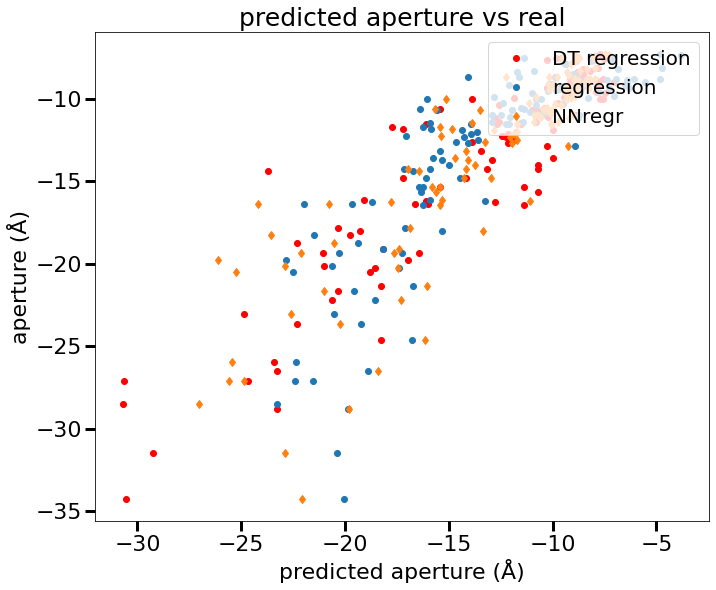

In [18]:
plt.plot(y_tree, y_test, 'ro', label='DT regression')
plt.plot(y_regr, y_test, 'o', label='regression')
plt.plot(y_NNregr, y1_test, 'd', label='NNregr')

plt.title ('predicted aperture vs real',fontsize=25)
plt.xlabel('predicted aperture (Å)', fontsize=22)
plt.ylabel('aperture (Å)',fontsize=22)
plt.legend(loc='upper right', fontsize=20)

# plt.ylim(1, 5)
# plt.xlim(1, 5)

plt.tick_params(which='both', width=3)
plt.tick_params(which='major', length=10)
plt.tick_params(which='minor', length=4, color='r')
plt.rcParams["figure.figsize"] = (11,9)

plt.yticks(fontsize=22)
plt.xticks(fontsize=22)

plt.show()

In [51]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor

regr = linear_model.LinearRegression()
tree=DecisionTreeRegressor(random_state=1)
NNregr = MLPRegressor(hidden_layer_sizes=(40, 30, 20, 15, 10), solver='lbfgs', random_state=1, max_iter=4600)

# k-fold cross validation
data_y, data_yhat_tree, data_yhat_NN, data_yhat_regr = list(), list(), list(), list()
kfold = KFold(n_splits=20, shuffle=True, random_state=5)
# enumerate splits
for train_ix, test_ix in kfold.split(x):
    # get data
    train_X, test_X = x[train_ix], x[test_ix]
    train_y, test_y = y[train_ix], y[test_ix]
    # fit model
    tree.fit(train_X, train_y)
    NNregr.fit(train_X, train_y.ravel())
    regr.fit(train_X, train_y)
    
    # make predictions
    yhat_tree = tree.predict(test_X)
    yhat_regr = regr.predict(test_X)
    yhat_NNregr = NNregr.predict(test_X)

    # store
    data_y.extend(test_y)
    data_yhat_tree.extend(yhat_tree)
    data_yhat_regr.extend(yhat_regr)
    data_yhat_NN.extend(yhat_NNregr)
    
# evaluate the model

R2_DT = (metrics.r2_score(data_y, data_yhat_tree))
Med_ABS_er_DT = (metrics.median_absolute_error(data_y, data_yhat_tree))
Max_error_DT = (metrics.max_error(data_y, data_yhat_tree))
EV_DT = (explained_variance_score(data_y, data_yhat_tree))
Mean_abs_perc_error_DT = (metrics.mean_absolute_percentage_error(data_y, data_yhat_tree))
MSE_DT = (metrics.mean_squared_error(data_y, data_yhat_tree))

R2_regr = (metrics.r2_score(data_y, data_yhat_regr))
Med_ABS_er_regr = (metrics.median_absolute_error(data_y, data_yhat_regr))
Max_error_regr = (metrics.max_error(data_y, data_yhat_regr))
EV_regr = (explained_variance_score(data_y, data_yhat_regr))
Mean_abs_perc_error_regr = (metrics.mean_absolute_percentage_error(data_y, data_yhat_regr))
MSE_regr = (metrics.mean_squared_error(data_y, data_yhat_regr))

R2_NN = (metrics.r2_score(data_y, data_yhat_NN))
Med_ABS_er_NN = (metrics.median_absolute_error(data_y, data_yhat_NN))
Max_error_NN = (metrics.max_error(data_y, data_yhat_NN))
EV_NN = (explained_variance_score(data_y, data_yhat_NN))
Mean_abs_perc_error_NN = (metrics.mean_absolute_percentage_error(data_y, data_yhat_NN))
MSE_NN = (metrics.mean_squared_error(data_y, data_yhat_NN))


head = ["Model", "R2", "Med ABS error", "Max error", "explained variance", "Mean ABS perc error", "MSE" ]

results = [["Decision tree", R2_DT, Med_ABS_er_DT, Max_error_DT, EV_DT, Mean_abs_perc_error_DT, MSE_DT],
           ["Regression", R2_regr, Med_ABS_er_regr, Max_error_regr, EV_regr, Mean_abs_perc_error_regr, MSE_regr],
           ["Neural Network", R2_NN, Med_ABS_er_NN, Max_error_NN, EV_NN, Mean_abs_perc_error_NN, MSE_NN]]

print(tabulate(results, headers = head, tablefmt = "fancy_grid", floatfmt=".3f"))

╒════════════════╤═══════╤═════════════════╤═════════════╤══════════════════════╤═══════════════════════╤════════╕
│ Model          │    R2 │   Med ABS error │   Max error │   explained variance │   Mean ABS perc error │    MSE │
╞════════════════╪═══════╪═════════════════╪═════════════╪══════════════════════╪═══════════════════════╪════════╡
│ Decision tree  │ 0.900 │           0.737 │       9.324 │                0.900 │                 0.096 │  3.717 │
├────────────────┼───────┼─────────────────┼─────────────┼──────────────────────┼───────────────────────┼────────┤
│ Regression     │ 0.677 │           1.980 │      21.242 │                0.677 │                 0.194 │ 12.012 │
├────────────────┼───────┼─────────────────┼─────────────┼──────────────────────┼───────────────────────┼────────┤
│ Neural Network │ 0.828 │           0.925 │      14.716 │                0.828 │                 0.112 │  6.401 │
╘════════════════╧═══════╧═════════════════╧═════════════╧══════════════════════

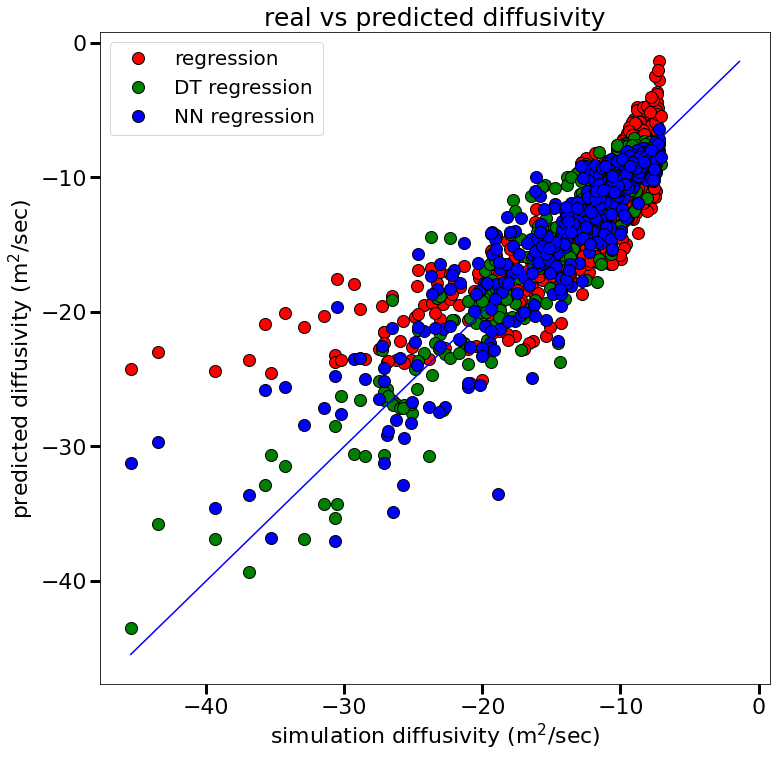

In [52]:
plt.plot(data_y, data_yhat_regr, 'o', label='regression', c='r', markersize='12', linewidth=3, markeredgecolor='k')
plt.plot(data_y, data_yhat_tree, 'o', label='DT regression', c='g', markersize='12', linewidth=3, markeredgecolor='k')
plt.plot(data_y, data_yhat_NN, 'o', label='NN regression', c='b', markersize='12', linewidth=3, markeredgecolor='k')

plt.title ('real vs predicted diffusivity',fontsize=25)
plt.xlabel('simulation diffusivity ($\mathregular{m^{2}}$/sec)', fontsize=22)
plt.ylabel('predicted diffusivity ($\mathregular{m^{2}}$/sec)',fontsize=22)
plt.legend(loc='upper left', fontsize=20)

p1 = max(max(data_y), max(data_yhat_regr))
p2 = min(min(data_y), min(data_yhat_regr))
plt.plot([p1, p2], [p1, p2],'b-' )

# plt.ylim(1.5, 5)
# plt.xlim(1.5, 5)

plt.tick_params(which='both', width=3)
plt.tick_params(which='major', length=10)
plt.tick_params(which='minor', length=4, color='r')
plt.rcParams["figure.figsize"] = (12,12)

plt.yticks(fontsize=22)
plt.xticks(fontsize=22)

plt.show()

In [20]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

regr = linear_model.LinearRegression()
tree=DecisionTreeRegressor(random_state=1, max_depth=5)
NNregr = MLPRegressor(hidden_layer_sizes=(100), solver='adam', random_state=1, max_iter=7000)

scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

# k-fold cross validation
data_y, data_yhat_tree, data_yhat_NN, data_yhat_regr = list(), list(), list(), list()
kfold = KFold(n_splits=20, shuffle=True, random_state=5)
# enumerate splits
for train_ix, test_ix in kfold.split(x):
    # get data
    train_X, test_X = x[train_ix], x[test_ix]
    train_y, test_y = y[train_ix], y[test_ix]
    
#     scaler = StandardScaler()
#     scaler.fit(train_X)
#     train_X = scaler.transform(train_X)
#     scaler.fit(test_X)
#     test_X = scaler.transform(test_X)
    
    # fit model
    tree.fit(train_X, train_y)
    NNregr.fit(train_X, train_y.ravel())
    regr.fit(train_X, train_y)
    
    # make predictions
    yhat_tree = tree.predict(test_X)
    yhat_regr = regr.predict(test_X)
    yhat_NNregr = NNregr.predict(test_X)

    # store
    data_y.extend(test_y)
    data_yhat_tree.extend(yhat_tree)
    data_yhat_regr.extend(yhat_regr)
    data_yhat_NN.extend(yhat_NNregr)
    
# evaluate the model

R2_DT = (metrics.r2_score(data_y, data_yhat_tree))
Med_ABS_er_DT = (metrics.median_absolute_error(data_y, data_yhat_tree))
Max_error_DT = (metrics.max_error(data_y, data_yhat_tree))
EV_DT = (explained_variance_score(data_y, data_yhat_tree))
Mean_abs_perc_error_DT = (metrics.mean_absolute_percentage_error(data_y, data_yhat_tree))
MSE_DT = (metrics.mean_squared_error(data_y, data_yhat_tree))

R2_regr = (metrics.r2_score(data_y, data_yhat_regr))
Med_ABS_er_regr = (metrics.median_absolute_error(data_y, data_yhat_regr))
Max_error_regr = (metrics.max_error(data_y, data_yhat_regr))
EV_regr = (explained_variance_score(data_y, data_yhat_regr))
Mean_abs_perc_error_regr = (metrics.mean_absolute_percentage_error(data_y, data_yhat_regr))
MSE_regr = (metrics.mean_squared_error(data_y, data_yhat_regr))

R2_NN = (metrics.r2_score(data_y, data_yhat_NN))
Med_ABS_er_NN = (metrics.median_absolute_error(data_y, data_yhat_NN))
Max_error_NN = (metrics.max_error(data_y, data_yhat_NN))
EV_NN = (explained_variance_score(data_y, data_yhat_NN))
Mean_abs_perc_error_NN = (metrics.mean_absolute_percentage_error(data_y, data_yhat_NN))
MSE_NN = (metrics.mean_squared_error(data_y, data_yhat_NN))


head = ["Model", "R2", "Med ABS error", "Max error", "explained variance", "Mean ABS perc error", "MSE" ]

results = [["Decision tree", R2_DT, Med_ABS_er_DT, Max_error_DT, EV_DT, Mean_abs_perc_error_DT, MSE_DT],
           ["Regression", R2_regr, Med_ABS_er_regr, Max_error_regr, EV_regr, Mean_abs_perc_error_regr, MSE_regr],
           ["Neural Network", R2_NN, Med_ABS_er_NN, Max_error_NN, EV_NN, Mean_abs_perc_error_NN, MSE_NN]]

print(tabulate(results, headers = head, tablefmt = "fancy_grid", floatfmt=".3f"))

╒════════════════╤═══════╤═════════════════╤═════════════╤══════════════════════╤═══════════════════════╤════════╕
│ Model          │    R2 │   Med ABS error │   Max error │   explained variance │   Mean ABS perc error │    MSE │
╞════════════════╪═══════╪═════════════════╪═════════════╪══════════════════════╪═══════════════════════╪════════╡
│ Decision tree  │ 0.902 │           0.830 │      10.436 │                0.902 │                 0.089 │  3.636 │
├────────────────┼───────┼─────────────────┼─────────────┼──────────────────────┼───────────────────────┼────────┤
│ Regression     │ 0.677 │           1.980 │      21.242 │                0.677 │                 0.194 │ 12.012 │
├────────────────┼───────┼─────────────────┼─────────────┼──────────────────────┼───────────────────────┼────────┤
│ Neural Network │ 0.819 │           0.964 │      16.988 │                0.819 │                 0.113 │  6.709 │
╘════════════════╧═══════╧═════════════════╧═════════════╧══════════════════════

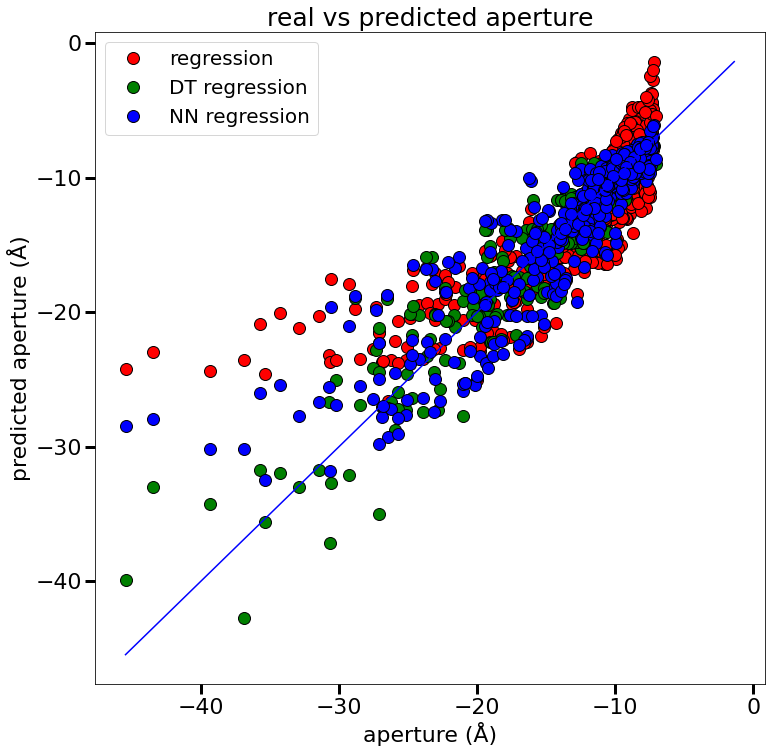

In [21]:
plt.plot(data_y, data_yhat_regr, 'o', label='regression', c='r', markersize='12', linewidth=3, markeredgecolor='k')
plt.plot(data_y, data_yhat_tree, 'o', label='DT regression', c='g', markersize='12', linewidth=3, markeredgecolor='k')
plt.plot(data_y, data_yhat_NN, 'o', label='NN regression', c='b', markersize='12', linewidth=3, markeredgecolor='k')

plt.title ('real vs predicted aperture',fontsize=25)
plt.xlabel('aperture (Å)', fontsize=22)
plt.ylabel('predicted aperture (Å)',fontsize=22)
plt.legend(loc='upper left', fontsize=20)

p1 = max(max(data_y), max(data_yhat_regr))
p2 = min(min(data_y), min(data_yhat_regr))
plt.plot([p1, p2], [p1, p2],'b-' )

# plt.ylim(1.5, 5)
# plt.xlim(1.5, 5)

plt.tick_params(which='both', width=3)
plt.tick_params(which='major', length=10)
plt.tick_params(which='minor', length=4, color='r')
plt.rcParams["figure.figsize"] = (12,12)

plt.yticks(fontsize=22)
plt.xticks(fontsize=22)

plt.show()

In [22]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor

# tree=DecisionTreeRegressor(random_state=0, max_depth=5)
# regr = linear_model.LinearRegression()
# NNregr = MLPRegressor(hidden_layer_sizes=(200), solver='lbfgs', random_state=1, max_iter=2800)

data_y, data_yhat_tree, data_yhat_NN, data_yhat_regr = list(), list(), list(), list()

for i in range(3):
    kfold = KFold(n_splits=10, shuffle=True, random_state = None)
    tree=DecisionTreeRegressor(random_state=None, max_depth=5)
    regr = linear_model.LinearRegression()
    NNregr = MLPRegressor(hidden_layer_sizes=(400), solver='adam', random_state=None, max_iter=5500)
    # enumerate splits
    for train_ix, test_ix in kfold.split(x):
        # get data
        train_X, test_X = x[train_ix], x[test_ix]
        train_y, test_y = y[train_ix], y[test_ix]
        # fit model
        tree.fit(train_X, train_y)
        regr.fit(train_X, train_y)
        NNregr.fit(train_X, train_y.ravel())
        
        # make predictions
        yhat_tree = tree.predict(test_X) 
        yhat_regr = regr.predict(test_X)
        yhat_NNregr = NNregr.predict(test_X)
        
        # store
        data_y.extend(test_y)
        data_yhat_tree.extend(yhat_tree)
        data_yhat_regr.extend(yhat_regr)
        data_yhat_NN.extend(yhat_NNregr)

R2_DT = (metrics.r2_score(data_y, data_yhat_tree))
Med_ABS_er_DT = (metrics.median_absolute_error(data_y, data_yhat_tree))
Max_error_DT = (metrics.max_error(data_y, data_yhat_tree))
EV_DT = (explained_variance_score(data_y, data_yhat_tree))
Mean_abs_perc_error_DT = (metrics.mean_absolute_percentage_error(data_y, data_yhat_tree))
MSE_DT = (metrics.mean_squared_error(data_y, data_yhat_tree))

R2_regr = (metrics.r2_score(data_y, data_yhat_regr))
Med_ABS_er_regr = (metrics.median_absolute_error(data_y, data_yhat_regr))
Max_error_regr = (metrics.max_error(data_y, data_yhat_regr))
EV_regr = (explained_variance_score(data_y, data_yhat_regr))
Mean_abs_perc_error_regr = (metrics.mean_absolute_percentage_error(data_y, data_yhat_regr))
MSE_regr = (metrics.mean_squared_error(data_y, data_yhat_regr))

R2_NN = (metrics.r2_score(data_y, data_yhat_NN))
Med_ABS_er_NN = (metrics.median_absolute_error(data_y, data_yhat_NN))
Max_error_NN = (metrics.max_error(data_y, data_yhat_NN))
EV_NN = (explained_variance_score(data_y, data_yhat_NN))
Mean_abs_perc_error_NN = (metrics.mean_absolute_percentage_error(data_y, data_yhat_NN))
MSE_NN = (metrics.mean_squared_error(data_y, data_yhat_NN))


head = ["Model", "R2", "Med ABS error", "Max error", "explained variance", "Mean ABS perc error", "MSE" ]

results = [["Decision tree", R2_DT, Med_ABS_er_DT, Max_error_DT, EV_DT, Mean_abs_perc_error_DT, MSE_DT],
           ["Regression", R2_regr, Med_ABS_er_regr, Max_error_regr, EV_regr, Mean_abs_perc_error_regr, MSE_regr],
           ["Neural Network", R2_NN, Med_ABS_er_NN, Max_error_NN, EV_NN, Mean_abs_perc_error_NN, MSE_NN]]
 
print(tabulate(results, headers = head, tablefmt = "fancy_grid", floatfmt=".3f"))

╒════════════════╤═══════╤═════════════════╤═════════════╤══════════════════════╤═══════════════════════╤════════╕
│ Model          │    R2 │   Med ABS error │   Max error │   explained variance │   Mean ABS perc error │    MSE │
╞════════════════╪═══════╪═════════════════╪═════════════╪══════════════════════╪═══════════════════════╪════════╡
│ Decision tree  │ 0.900 │           0.850 │      10.912 │                0.900 │                 0.091 │  3.719 │
├────────────────┼───────┼─────────────────┼─────────────┼──────────────────────┼───────────────────────┼────────┤
│ Regression     │ 0.677 │           2.015 │      21.617 │                0.677 │                 0.193 │ 11.991 │
├────────────────┼───────┼─────────────────┼─────────────┼──────────────────────┼───────────────────────┼────────┤
│ Neural Network │ 0.813 │           0.936 │      17.528 │                0.813 │                 0.114 │  6.938 │
╘════════════════╧═══════╧═════════════════╧═════════════╧══════════════════════

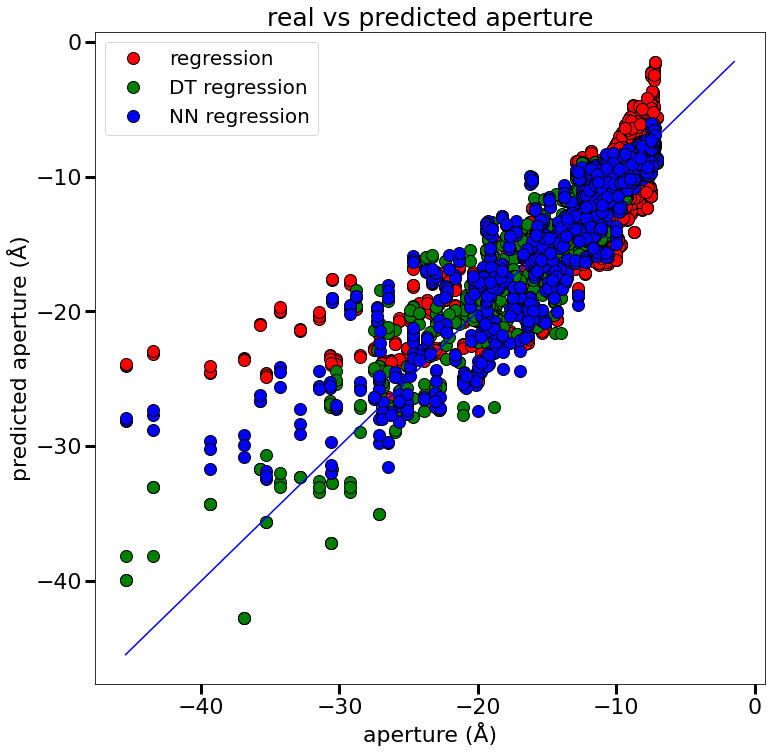

In [52]:
plt.plot(data_y, data_yhat_regr, 'o', label='regression', c='r', markersize='12', linewidth=3, markeredgecolor='k')
plt.plot(data_y, data_yhat_tree, 'o', label='DT regression', c='g', markersize='12', linewidth=3, markeredgecolor='k')
plt.plot(data_y, data_yhat_NN, 'o', label='NN regression', c='b', markersize='12', linewidth=3, markeredgecolor='k')

plt.title ('real vs predicted aperture',fontsize=25)
plt.xlabel('aperture (Å)', fontsize=22)
plt.ylabel('predicted aperture (Å)',fontsize=22)
plt.legend(loc='upper left', fontsize=20)

p1 = max(max(data_y), max(data_yhat_regr))
p2 = min(min(data_y), min(data_yhat_regr))
plt.plot([p1, p2], [p1, p2],'b-' )

# plt.ylim(1.5, 5)
# plt.xlim(1.5, 5)

plt.tick_params(which='both', width=3)
plt.tick_params(which='major', length=10)
plt.tick_params(which='minor', length=4, color='r')
plt.rcParams["figure.figsize"] = (12,12)

plt.yticks(fontsize=22)
plt.xticks(fontsize=22)

plt.show()

In [ ]:
print('R2 for DT: %.3f' % (metrics.r2_score(data_y, DT_yhat)))

In [ ]:
print('R2 for DT: {:.2}'.format(metrics.r2_score(data_y, DT_yhat)))

In [ ]:
import mlxtend
from mlxtend.evaluate import paired_ttest_5x2cv

In [ ]:
tree=DecisionTreeRegressor(random_state=0, max_depth=3)
regr = linear_model.LinearRegression()

t, p = paired_ttest_5x2cv(estimator1=tree,
                          estimator2=regr,
                          X=x, y=y,
                          random_seed=None)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

In [ ]:
from mlxtend.evaluate import paired_ttest_kfold_cv

In [ ]:
t, p = paired_ttest_kfold_cv(estimator1=tree,
                          estimator2=regr,
                          X=x, y=y,
                          random_seed=None)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)